In [35]:
!pip install split-folders

In [36]:
import splitfolders

In [37]:
splitfolders.ratio("/content/drive/MyDrive/Utensils-final/Raw", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 907 files [00:12, 71.26 files/s]


In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [39]:
img = mping.imread("Spoon.jpg")

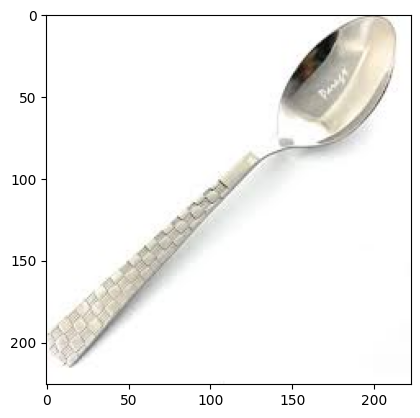

In [40]:
plt.imshow(img)

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train = train_datagen.flow_from_directory("output/train/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 807 images belonging to 20 classes.


In [45]:
test = train_datagen.flow_from_directory("output/val/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 100 images belonging to 20 classes.


In [46]:
from tensorflow.keras.preprocessing import image

In [47]:
test_image = image.load_img('Spoon.jpg', target_size=(224,224))

In [48]:
test_image = image.img_to_array(test_image)

In [49]:
test_image = tf.expand_dims(test_image,axis=0)

In [50]:
test_image = test_image/255.

In [51]:
test_image.shape

TensorShape([1, 224, 224, 3])

In [52]:
import tensorflow_hub as hub

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

batch_size = 16

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [57]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [58]:
history = m.fit(train,epochs=5,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/5
26/26 [==============================] - 51s 2s/step - loss: 0.1490 - accuracy: 0.9814 - val_loss: 0.5750 - val_accuracy: 0.8200
Epoch 2/5
26/26 [==============================] - 50s 2s/step - loss: 0.1640 - accuracy: 0.9765 - val_loss: 0.5924 - val_accuracy: 0.8100
Epoch 3/5
26/26 [==============================] - 49s 2s/step - loss: 0.1525 - accuracy: 0.9802 - val_loss: 0.5379 - val_accuracy: 0.8600
Epoch 4/5
26/26 [==============================] - 51s 2s/step - loss: 0.1382 - accuracy: 0.9827 - val_loss: 0.6390 - val_accuracy: 0.8100
Epoch 5/5
26/26 [==============================] - 50s 2s/step - loss: 0.1485 - accuracy: 0.9740 - val_loss: 0.5347 - val_accuracy: 0.8400


In [59]:
classes=train.class_indices

In [60]:
classes=list(classes.keys())

In [61]:
m.predict(test_image)

1/1 [==============================] - 0s 24ms/step


array([[5.6168914e-04, 7.0279074e-04, 2.2162061e-05, 2.9969975e-01,
        2.3095906e-03, 3.1646132e-04, 1.3790691e-03, 8.0743657e-06,
        3.8655192e-02, 1.7035743e-03, 7.3577030e-05, 2.1912870e-03,
        1.7435326e-05, 5.4537933e-02, 5.9517151e-01, 2.5936239e-04,
        6.1727146e-04, 7.5343552e-05, 4.2213636e-05, 1.6557320e-03]],
      dtype=float32)

In [62]:
classes[tf.argmax(m.predict(test_image),axis=1).numpy()[0]]

1/1 [==============================] - 0s 28ms/step


'SOUP_SPOON'

In [63]:
import pandas as pd

<Axes: >

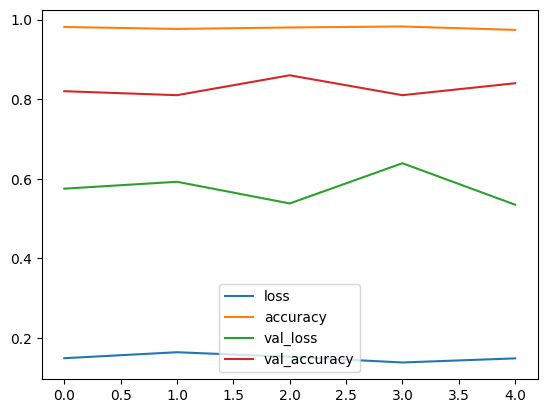

In [64]:
pd.DataFrame(history.history).plot()


In [29]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 20)                25620     
                                                                 
Total params: 4075184 (15.55 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________
